In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('train.csv') #class is given for each molecule
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: SalePrice, Length: 663, dtype: int64


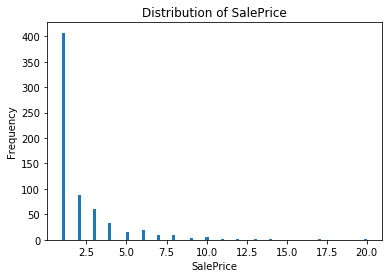

In [4]:
distribution = df['SalePrice'].value_counts()
print(distribution)
plt.hist(distribution, bins=100)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice')
plt.show()


/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


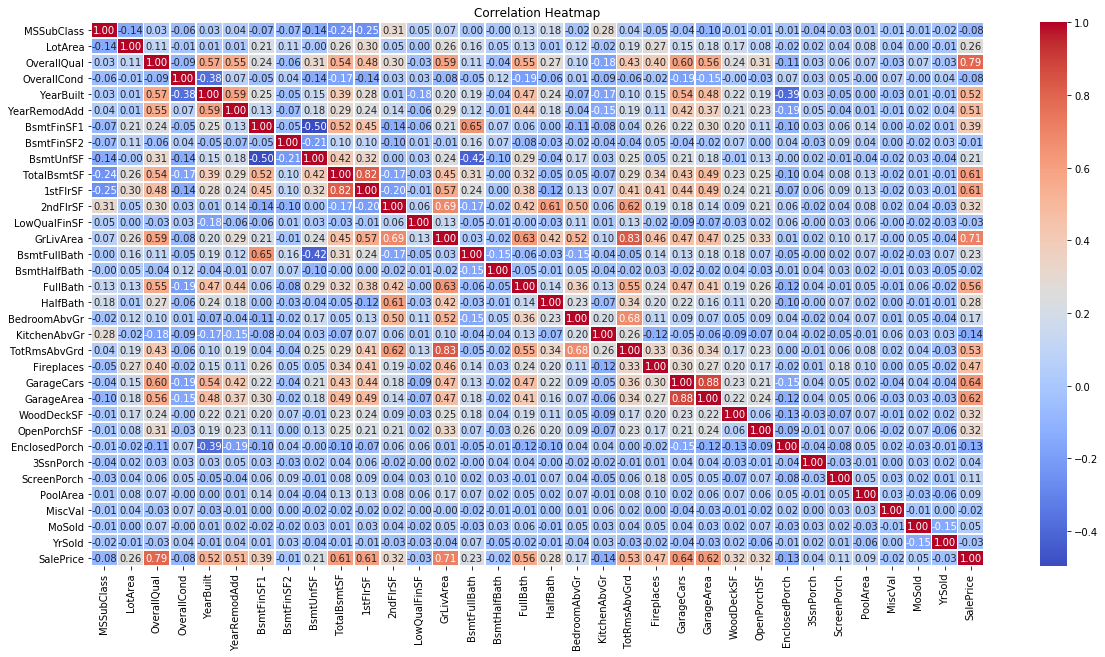

In [5]:

features = df.drop('Id', axis=1) 
df_num = features.select_dtypes(include=['float', 'int'])
df_num.dropna(axis=1, inplace=True)
# Computes the correlation matrix
correlation_matrix = df_num.corr()

# Creates a correlation heatmap of each feature
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [6]:
#df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Accuracy: 0.8905173518227992


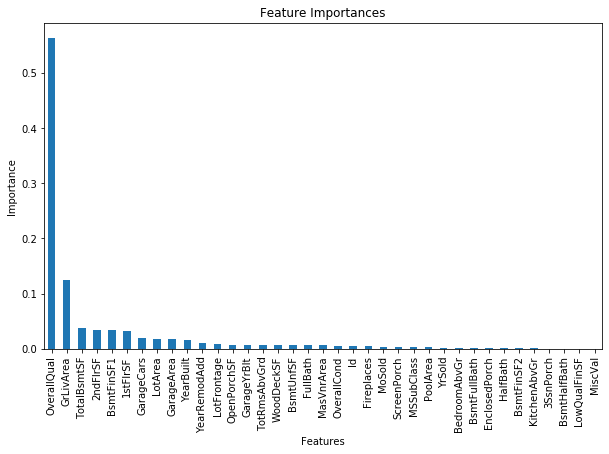

In [7]:
df_num = df.select_dtypes(include=['float', 'int'])
mean_values = df_num.mean()
df_num.fillna(mean_values, inplace=True)

X = df_num.drop('SalePrice', axis=1)  # Features (properties) no Class variable drop your traget variable
y = df_num['SalePrice']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
#random_state control the random shuffling of the data before splitting it into training and testing sets

# Create a new RandomForestRegressor model with the best hyperparameters
best_model = RandomForestRegressor(n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Fit the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = best_model.predict(X_test)

# Evaluate the model performance
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

importances = pd.Series(best_model.feature_importances_, index=X_train.columns)

# Sort feature importances in descending order
importances = importances.sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
importances.plot.bar()
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [8]:

# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = feature_importances_df.head(20)['Feature'].tolist()

print(top_20_features)

['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1', '1stFlrSF', 'GarageCars', 'LotArea', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'LotFrontage', 'OpenPorchSF', 'GarageYrBlt', 'TotRmsAbvGrd', 'WoodDeckSF', 'BsmtUnfSF', 'FullBath', 'MasVnrArea', 'OverallCond']


In [9]:
X_train_top_10 = X_train[top_20_features]
X_test_top_10 = X_test[top_20_features]

# Build a new model using the top 10 features
new_model = RandomForestRegressor()  # Use the desired model

# Train the new model on the top 10 features
new_model.fit(X_train_top_10, y_train)

# Make predictions on the test data using the new model
predictions = new_model.predict(X_test_top_10)

# Evaluate the performance of the new model
accuracy = new_model.score(X_test_top_10, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.893167500753679


In [10]:
test_file_path = "test.csv"
test_data = pd.read_csv(test_file_path)
mean_values = test_data.mean()
test_data.fillna(mean_values, inplace=True)

X_test_top_20 = test_data[top_20_features]
ids = test_data.pop('Id')
# Split the data into training and testing sets
preds = new_model.predict(X_test_top_20)
output = pd.DataFrame({'Id': ids[:len(preds)],
                       'SalePrice': preds})

output.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,Id,SalePrice
0,1461,127908.16
1,1462,162064.50
2,1463,178084.10
3,1464,186027.82
4,1465,204676.12


In [11]:
sample_submission_df = pd.read_csv('sample_submission.csv')
sample_submission_df['SalePrice'] = new_model.predict(X_test_top_20)
sample_submission_df.to_csv('submission.csv', index=False)
sample_submission_df.head()

,Id,SalePrice
0,1461,127908.16
1,1462,162064.50
2,1463,178084.10
3,1464,186027.82
4,1465,204676.12
